## Logic Based FizzBuzz Function [Software 1.0]

In [151]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [152]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    '''List is used for the sake of convinience when we create CSV file as it is easy to append in list and it can 
    then be passed to the dataframe directly making our tasks simpler.'''
    
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    '''We need training data to teach our model so that later we can present it unseen data on which it can make 
    skillful predictions.'''
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    '''Dataframes are the 2D that can have columns of different data types. It can take lists, dictionaries, series
    or another dataframe as input. Dataframes stores the data in the form of tables which is easy to convert into csv 
    file by using pandas'''
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [153]:
def processData(dataset):
    
    # Why do we have to process?
    '''We have to process it as we need only the values stored in the dataframe and not the index and object type.'''
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [154]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        '''As our training data set has integers ranging from 101 to 1000 i.e 900 integers thus to represent the
        numbers in binary form we require 10 bits as 2^10 = 1024'''
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [155]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [170]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout , LeakyReLU
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import adam

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    '''A model is a core structure which consists of layers in organised form.'''
    
    # Why use Dense layer and then activation?
    '''We need to specify the number of inputs to the layer and the number of processing nodes then we apply the
    activation function to introduce the non-linear properties in the model so that our model can learn better'''
    
    # Why use sequential model with layers?
    '''Sequential model is a stack of layers. The input from the one layer in feed to another. We are using sequential
    model because we have known fixed source of input and fixed destination. Thus using sequential model is preferred 
    over using functional model.'''
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    #model.add(Activation('relu'))
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(Dense(128))
    model.add(Activation('relu'))
    
    # Why dropout?
    '''Dropout defines the percentage of nodes or neurons to be dropped or ignored from the layer
    while training in order to avoid overfitting. Dropout is a regularization technique where
    neurons are randomly selected to be ignored. The ignored neurons have no contribution in
    forward pass and their weights are also not updated in the backward pass.'''
   
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    # Why Softmax?
    '''Softmax is an activation function mainly used in multiple classification problems. The
    output from the softmax varies from 0 to 1 and the sum of all the output is equal to 1 thus
    the output from the softmax function can be thought of as a probability that the input will
    belong to each target class.'''
    
    model.summary()
    
    # Why use categorical_crossentropy?
    '''The categorical crossentropy is used for multiclassification tasks. Since here we have 4-class problem i.e 4
    output classes namely Fizz, Buzz, Fizzbuzz and other we are using categorical crossentropy as loss function.'''
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [171]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [172]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               5632      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_30 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 516       
_________________________________________________________________
activation_31 (Activation)   (None, 4)                 0         
Total para

# <font color = blue>Run Model</font>

In [173]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 180
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

'''Early stopping is used to stop the training of the model if the accuracy stops increasing thereby preventing 
overfitting.'''

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 676us/step - loss: 1.2952 - acc: 0.4569 - val_loss: 1.1677 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1797 - acc: 0.5333 - val_loss: 1.1881 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 40us/step - loss: 1.1654 - acc: 0.5333 - val_loss: 1.1769 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1497 - acc: 0.5333 - val_loss: 1.1555 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1509 - acc: 0.5333 - val_loss: 1.1455 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1450 - acc: 0.5333 - val_loss: 1.1439 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 41us/step - loss: 1.1447 - acc: 0.5333 - val_loss: 1.1455 - val_acc: 0.5333
E

720/720 [==============================] - 0s 30us/step - loss: 0.7699 - acc: 0.6694 - val_loss: 1.0046 - val_acc: 0.5500
Epoch 61/10000
720/720 [==============================] - 0s 28us/step - loss: 0.7466 - acc: 0.7097 - val_loss: 0.9957 - val_acc: 0.5722
Epoch 62/10000
720/720 [==============================] - 0s 29us/step - loss: 0.7303 - acc: 0.7167 - val_loss: 0.9817 - val_acc: 0.6167
Epoch 63/10000
720/720 [==============================] - 0s 30us/step - loss: 0.7145 - acc: 0.7181 - val_loss: 0.9681 - val_acc: 0.6222
Epoch 64/10000
720/720 [==============================] - 0s 28us/step - loss: 0.7145 - acc: 0.7208 - val_loss: 0.9643 - val_acc: 0.6333
Epoch 65/10000
720/720 [==============================] - 0s 28us/step - loss: 0.6953 - acc: 0.7264 - val_loss: 0.9489 - val_acc: 0.6333
Epoch 66/10000
720/720 [==============================] - 0s 32us/step - loss: 0.6924 - acc: 0.7500 - val_loss: 0.9346 - val_acc: 0.6444
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1405 - acc: 0.9861 - val_loss: 0.4042 - val_acc: 0.8889
Epoch 121/10000
720/720 [==============================] - 0s 29us/step - loss: 0.1251 - acc: 0.9889 - val_loss: 0.4064 - val_acc: 0.8722
Epoch 122/10000
720/720 [==============================] - 0s 30us/step - loss: 0.1217 - acc: 0.9903 - val_loss: 0.4157 - val_acc: 0.8611
Epoch 123/10000
720/720 [==============================] - 0s 27us/step - loss: 0.1182 - acc: 0.9931 - val_loss: 0.4048 - val_acc: 0.8833
Epoch 124/10000
720/720 [==============================] - 0s 29us/step - loss: 0.1258 - acc: 0.9819 - val_loss: 0.3874 - val_acc: 0.8944
Epoch 125/10000
720/720 [==============================] - 0s 29us/step - loss: 0.1121 - acc: 0.9944 - val_loss: 0.3955 - val_acc: 0.8889
Epoch 126/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1165 - acc: 0.9875 - val_loss: 0.3820 - val_acc: 0.8944
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 40us/step - loss: 0.0338 - acc: 0.9958 - val_loss: 0.2488 - val_acc: 0.9278
Epoch 180/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0352 - acc: 0.9958 - val_loss: 0.2440 - val_acc: 0.9389
Epoch 181/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0300 - acc: 0.9972 - val_loss: 0.2719 - val_acc: 0.9000
Epoch 182/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0344 - acc: 0.9972 - val_loss: 0.2395 - val_acc: 0.9389
Epoch 183/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0307 - acc: 0.9986 - val_loss: 0.2487 - val_acc: 0.9333
Epoch 184/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0320 - acc: 0.9986 - val_loss: 0.2560 - val_acc: 0.9167
Epoch 185/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0271 - acc: 1.0000 - val_loss: 0.2463 - val_acc: 0.9222
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 27us/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.1811 - val_acc: 0.9556
Epoch 239/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.1823 - val_acc: 0.9556
Epoch 240/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0144 - acc: 0.9986 - val_loss: 0.1798 - val_acc: 0.9556
Epoch 241/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0152 - acc: 0.9972 - val_loss: 0.1900 - val_acc: 0.9556
Epoch 242/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0109 - acc: 1.0000 - val_loss: 0.1712 - val_acc: 0.9667
Epoch 243/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0127 - acc: 1.0000 - val_loss: 0.2088 - val_acc: 0.9278
Epoch 244/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0150 - acc: 0.9986 - val_loss: 0.1697 - val_acc: 0.9611
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 29us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.1762 - val_acc: 0.9444
Epoch 298/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.1547 - val_acc: 0.9722
Epoch 299/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.1723 - val_acc: 0.9444
Epoch 300/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.1816 - val_acc: 0.9444
Epoch 301/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.1510 - val_acc: 0.9722
Epoch 302/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.1522 - val_acc: 0.9722
Epoch 303/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0087 - acc: 0.9986 - val_loss: 0.1732 - val_acc: 0.9500
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 32us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1488 - val_acc: 0.9556
Epoch 357/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1504 - val_acc: 0.9500
Epoch 358/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.1694 - val_acc: 0.9389
Epoch 359/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1486 - val_acc: 0.9556
Epoch 360/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.1468 - val_acc: 0.9611
Epoch 361/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1640 - val_acc: 0.9500
Epoch 362/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1560 - val_acc: 0.9500
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 28us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.1409 - val_acc: 0.9667
Epoch 416/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.1326 - val_acc: 0.9611
Epoch 417/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.1352 - val_acc: 0.9611
Epoch 418/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1461 - val_acc: 0.9500
Epoch 419/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.1479 - val_acc: 0.9500
Epoch 420/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1450 - val_acc: 0.9667
Epoch 421/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0035 - acc: 0.9986 - val_loss: 0.1416 - val_acc: 0.9611
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 27us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1206 - val_acc: 0.9722
Epoch 475/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1489 - val_acc: 0.9556
Epoch 476/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1520 - val_acc: 0.9556
Epoch 477/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1345 - val_acc: 0.9556
Epoch 478/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9556
Epoch 479/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1479 - val_acc: 0.9444
Epoch 480/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1303 - val_acc: 0.9722
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 26us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1326 - val_acc: 0.9667
Epoch 534/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.1280 - val_acc: 0.9611
Epoch 535/10000
720/720 [==============================] - 0s 25us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1407 - val_acc: 0.9556
Epoch 536/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1439 - val_acc: 0.9556
Epoch 537/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1337 - val_acc: 0.9722
Epoch 538/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1340 - val_acc: 0.9722
Epoch 539/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1502 - val_acc: 0.9500
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 30us/step - loss: 0.0021 - acc: 0.9986 - val_loss: 0.1581 - val_acc: 0.9444
Epoch 593/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.2165 - val_acc: 0.9278
Epoch 594/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.1302 - val_acc: 0.9611
Epoch 595/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1286 - val_acc: 0.9611
Epoch 596/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1548 - val_acc: 0.9444
Epoch 597/10000
720/720 [==============================] - 0s 29us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1472 - val_acc: 0.9556
Epoch 598/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1268 - val_acc: 0.9667
Epoch 599/10000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

'Overfitting:If Val_loss is high and Training_loss is low.\nUnderfitting:If Val_loss is high and Training_loss is also high.'

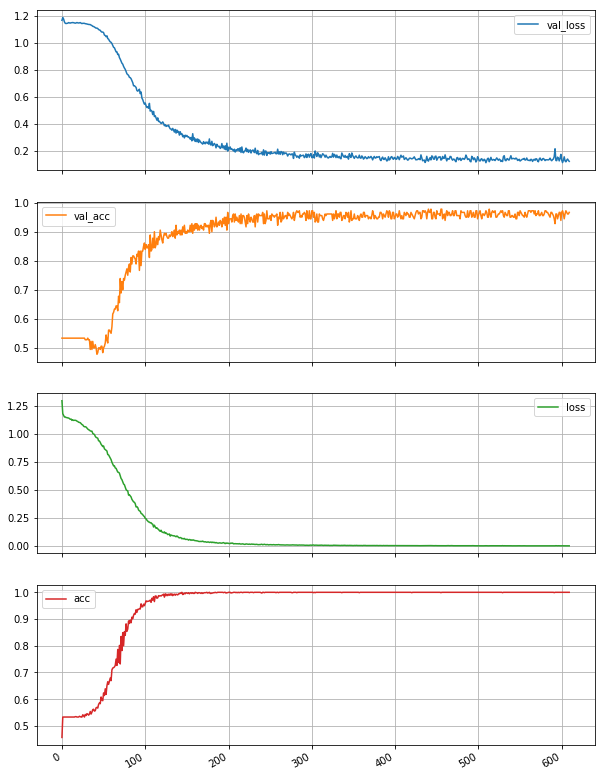

In [174]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

'''Overfitting:If Val_loss is high and Training_loss is low.
Underfitting:If Val_loss is high and Training_loss is also high.'''

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [175]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [176]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "anunayra")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291493")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 1  Correct :99
Testing Accuracy: 99.0


In [150]:
'''
Best Network configuration:
Activation function at first layer = LeakyReLU
Activation function at second layer = ReLU
Number of nodes in first layer = 512
Number of nodes in second layer = 128
Batch size = 180
Dropout = 0.2
Optimizer = Adam
Other all values are set to default
'''

'\nBest Network configuration:\nActivation function at first layer = LeakyReLU\nActivation function at second layer = ReLU\nNumber of nodes in first layer = 512\nNumber of nodes in second layer = 128\nDropout = 0.2\nOptimizer = Adam\nOther all values are set to default\n'